# Stock Market Clustering

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf

import matplotlib.pyplot as plt
import datetime as dt

import warnings
warnings.filterwarnings("ignore")

In [2]:
companiesDict = {
    "Amazon":"AMZN",
    "Apple":"AAPL",
    "Walgreen":"WBA",
    "Northrop Grumman":"NOC",
    "Boeing":"BA",
    "Lockheed Martin":"LMT",
    "McDonalds":"MCD",
    "Intel":"INTC",
    "IBM":"IBM",
    "Texas Instruments":"TXN",
    "MasterCard":"MA",
    "Microsoft":"MSFT",
    "General Electrics":"GE",
    "American Express":"AXP",
    "Pepsi":"PEP",
    "Coca Cola":"KO",
    "Johnson & Johnson":"JNJ",
    "Toyota":"TM",
    "Honda":"HMC",
    "Exxon":"XOM",
    "Chevron":"CVX",
    "Valero Energy":"VLO",
    "Ford":"F",
    "Bank of America":"BAC"}

In [3]:
dataSource = "yahoo"
startDate = "2015-04-25"
endDate = "2020-04-25"
df = yf.download(list(companiesDict.values()), start=startDate, end=endDate)

[*********************100%%**********************]  24 of 24 completed


In [4]:
df.head()

Price       Adj Close                                                          \
Ticker           AAPL       AMZN        AXP          BA        BAC        CVX   
Date                                                                            
2015-04-27  29.723989  21.927999  67.509315  130.068802  12.825891  73.842896   
2015-04-28  29.255651  21.465500  67.509315  129.813568  12.900075  74.798744   
2015-04-29  28.825426  21.468500  67.221840  128.616684  13.172089  75.209373   
2015-04-30  28.043394  21.089001  67.474464  126.143814  13.130877  74.758339   
2015-05-01  28.894886  21.143499  67.674858  127.314255  13.279246  73.398628   

Price                                                     ...   Volume  \
Ticker              F          GE        HMC         IBM  ...       MA   
Date                                                      ...            
2015-04-27   9.860425  112.211273  29.194046  108.570206  ...  4854300   
2015-04-28   9.959652  113.213188  27.211239  110.598801  ...  4786300   
2015-04-29  10.028508  113.087967  26.985554  110.904060  ...  9364700   
2015-04-30   9.890790  113.046196  27.025856  108.926323  ...  7470700   
2015-05-01   9.897050  114.006355  27.582012  110.439804  ...  4663100   

Price                                                                      \
Ticker          MCD      MSFT      NOC      PEP      TM      TXN      VLO   
Date                                                                        
2015-04-27  7282700  59248200  1231500  5348500  273000  8397300  8056400   
2015-04-28  4357400  60730800  1132300  5065900  421900  6729300  7905400   
2015-04-29  5697200  47804600  1397300  4963600  282900  5276300  6002600   
2015-04-30  8300300  64725500  2465400  6714400  246800  6756900  8067500   
2015-05-01  6280300  38937300  1136500  4622300  247100  5726700  6905700   

Price                          
Ticker          WBA       XOM  
Date                           
2015-04-27  4110200  10534600  
2015-04-28  2366500   9633800  
2015-04-29  3224500  12534100  
2015-04-30  4750200  13947700  
2015-05-01  2282200  12257100  

[5 rows x 144 columns]

In [5]:
df.isnull().sum().sum()

0

In [6]:
stockOpen = np.array(df["Open"]).T
stockClose = np.array(df["Close"]).T

In [7]:
movements = stockClose-stockOpen

In [8]:
sumOfMovements = np.sum(movements,1)

In [9]:
for i in range(len(companiesDict)):
    print("company:{}, Change:{}".format(df["High"].columns[i], sumOfMovements[i]))

company:AAPL, Change:46.02497673034668
company:AMZN, Change:-8.328699111938477
company:AXP, Change:-7.75982666015625
company:BA, Change:-73.14045715332031
company:BAC, Change:2.4299745559692383
company:CVX, Change:-21.669967651367188
company:F, Change:-14.990012645721436
company:GE, Change:-36.518144607543945
company:HMC, Change:-21.420005798339844
company:IBM, Change:-10.80291748046875
company:INTC, Change:42.489999771118164
company:JNJ, Change:46.10985565185547
company:KO, Change:13.67996597290039
company:LMT, Change:47.33030700683594
company:MA, Change:69.43009185791016
company:MCD, Change:49.1201171875
company:MSFT, Change:29.959903717041016
company:NOC, Change:79.23982238769531
company:PEP, Change:53.52012634277344
company:TM, Change:-51.96003723144531
company:TXN, Change:46.78992462158203
company:VLO, Change:-30.779918670654297
company:WBA, Change:-36.30998992919922
company:XOM, Change:-23.520084381103516


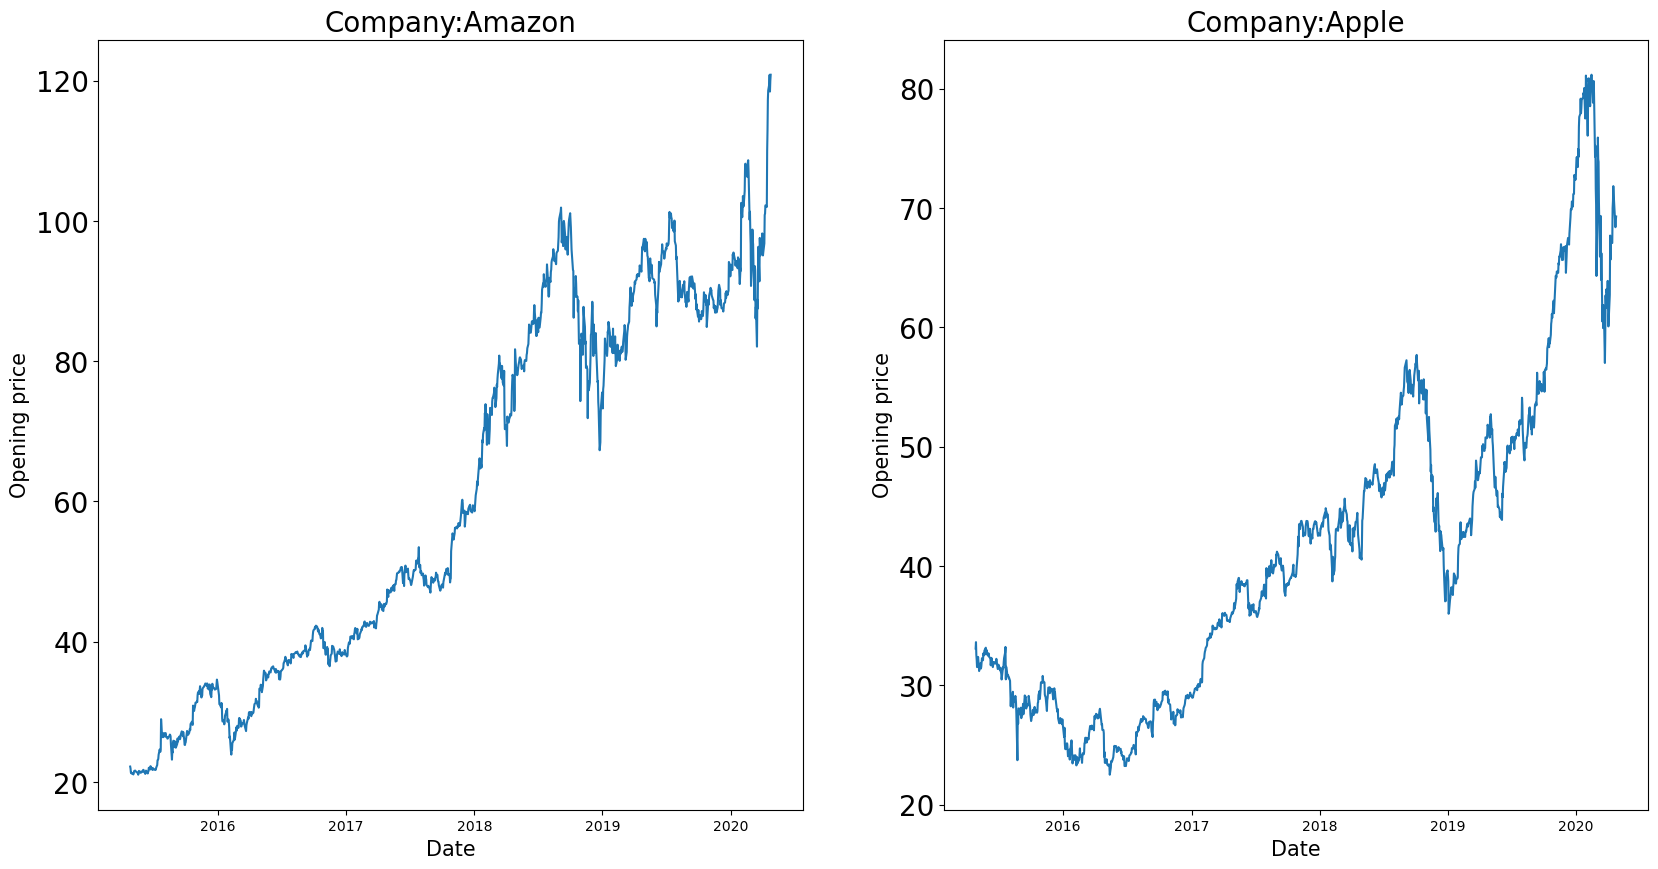

In [10]:
plt.figure(figsize = (20,10)) 
plt.subplot(1,2,1) 

plt.title("Company:Amazon",fontsize = 20)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 20)
plt.xlabel("Date",fontsize = 15)
plt.ylabel("Opening price",fontsize = 15)
plt.plot(df["Open"]["AMZN"])
plt.subplot(1,2,2) 

plt.title("Company:Apple",fontsize = 20)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 20)
plt.xlabel("Date",fontsize = 15)
plt.ylabel("Opening price",fontsize = 15)
plt.plot(df["Open"]["AAPL"])

plt.show()

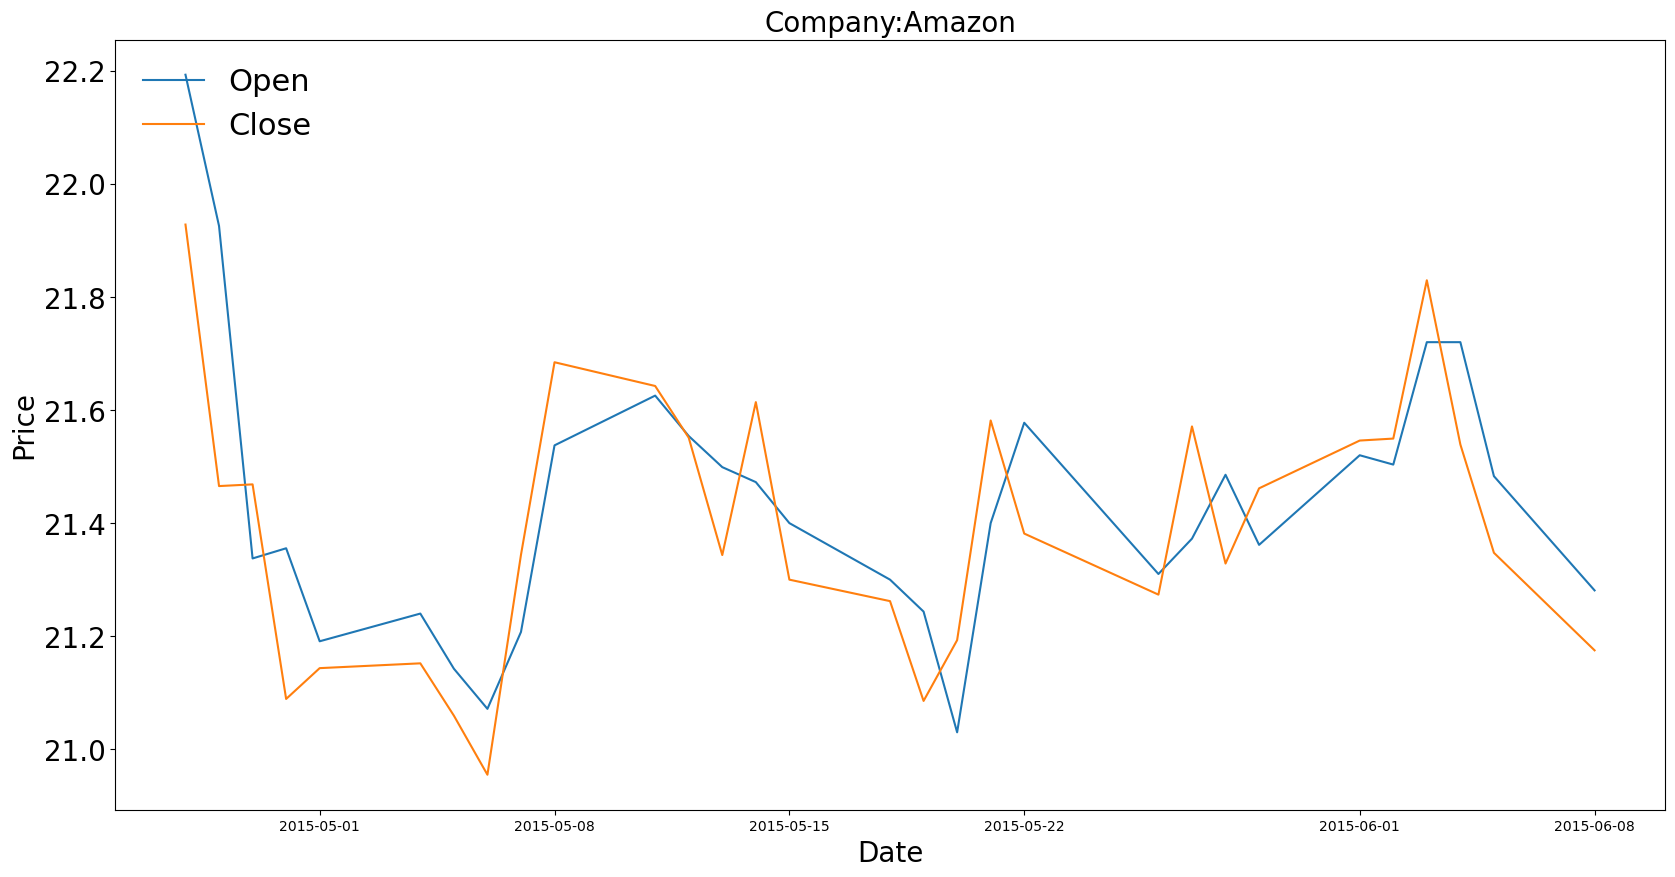

In [11]:
plt.figure(figsize = (20,10)) 
plt.title("Company:Amazon",fontsize = 20)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 20)
plt.xlabel("Date",fontsize = 20)
plt.ylabel("Price",fontsize = 20)
plt.plot(df.iloc[0:30]["Open"]["AMZN"],label = "Open") 
plt.plot(df.iloc[0:30]["Close"]["AMZN"],label = "Close") 
plt.legend(loc="upper left", frameon=False,framealpha=1,prop={"size": 22}) 
plt.show()

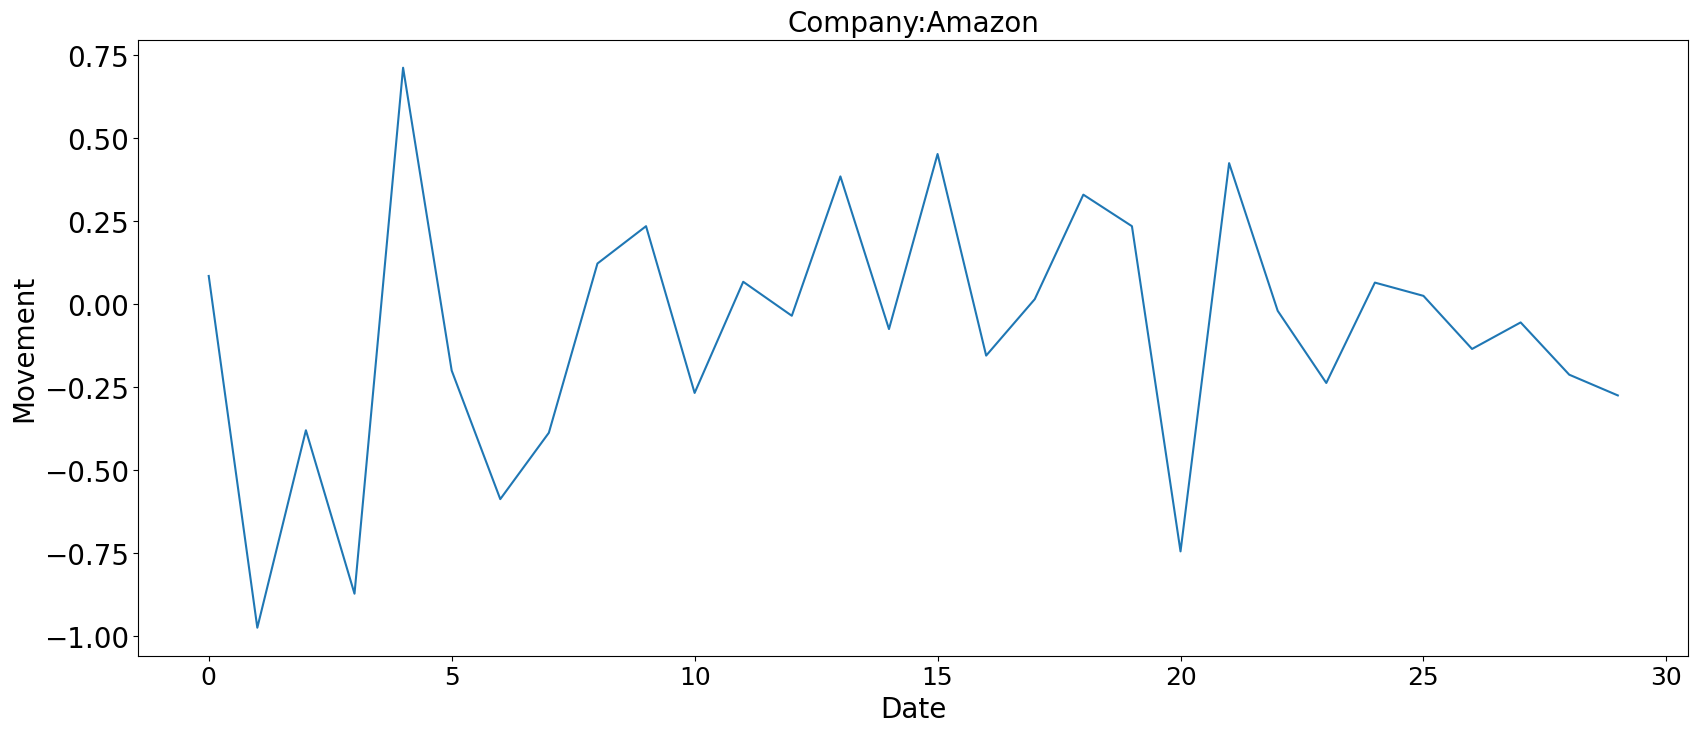

In [12]:
plt.figure(figsize = (20,8)) 
plt.title("Company:Amazon",fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 20)
plt.xlabel("Date",fontsize = 20)
plt.ylabel("Movement",fontsize = 20)
plt.plot(movements[0][0:30])
plt.show()

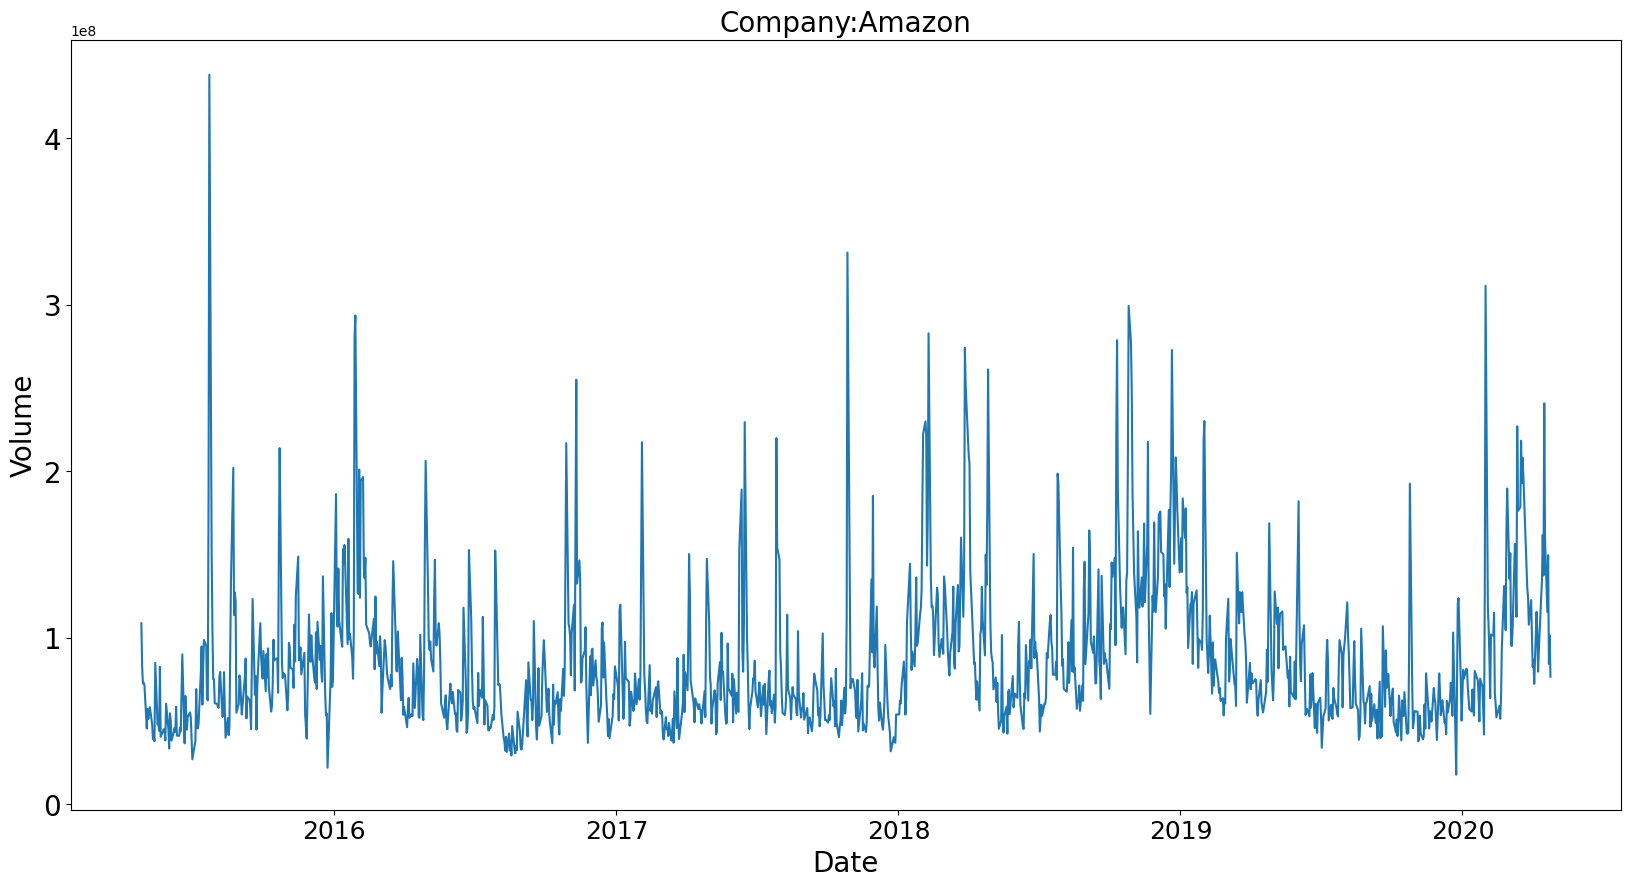

In [13]:
plt.figure(figsize = (20,10)) 
plt.title("Company:Amazon",fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 20)
plt.xlabel("Date",fontsize = 20)
plt.ylabel("Volume",fontsize = 20)
plt.plot(df["Volume"]["AMZN"],label = "Open")
plt.show()

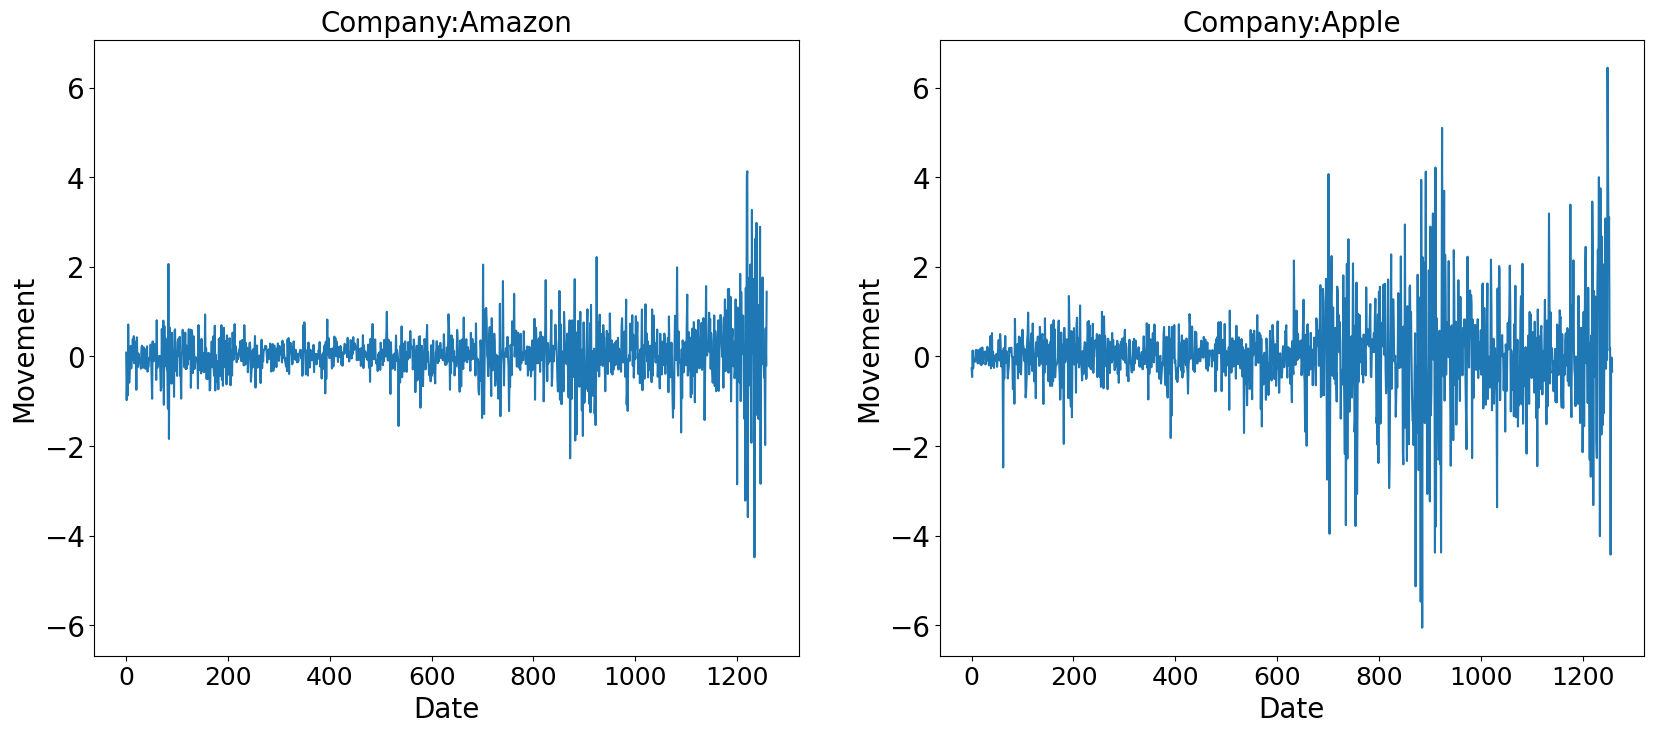

In [14]:
plt.figure(figsize = (20,8)) 
ax1 = plt.subplot(1,2,1)
plt.title("Company:Amazon",fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 20)
plt.xlabel("Date",fontsize = 20)
plt.ylabel("Movement",fontsize = 20)
plt.plot(movements[0]) 

plt.subplot(1,2,2,sharey = ax1)
plt.title("Company:Apple",fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 20)
plt.xlabel("Date",fontsize = 20)
plt.ylabel("Movement",fontsize = 20)
plt.plot(movements[1])

plt.show()

In [15]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
normMovements = normalizer.fit_transform(movements)

In [16]:
print(normMovements.min())
print(normMovements.max())
print(normMovements.mean())

-0.33511277974477655
0.2655449656433241
-3.7122922630446226e-05


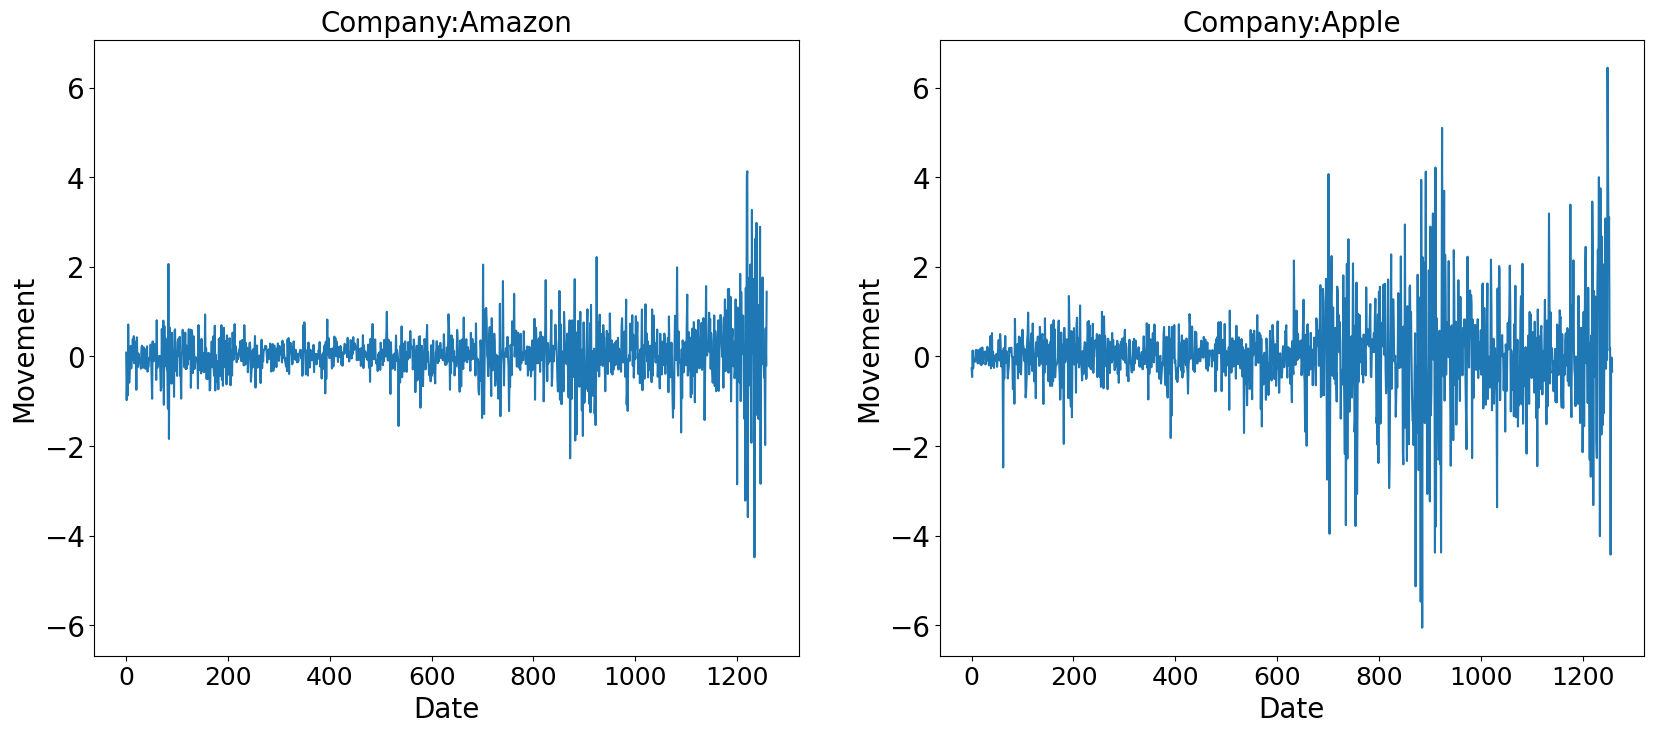

In [17]:
plt.figure(figsize = (20,8)) 
ax1 = plt.subplot(1,2,1)
plt.title("Company:Amazon",fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 20)
plt.xlabel("Date",fontsize = 20)
plt.ylabel("Movement",fontsize = 20)
plt.plot(movements[0]) 

plt.subplot(1,2,2,sharey = ax1)
plt.title("Company:Apple",fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 20)
plt.xlabel("Date",fontsize = 20)
plt.ylabel("Movement",fontsize = 20)
plt.plot(movements[1])

plt.show()

## K-Means Clustering

In [18]:
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline

normalizer = Normalizer()

model = KMeans(n_clusters=5, max_iter=1000, random_state=1)

pipeline = make_pipeline(normalizer, model)

pipeline.fit(movements)
yPred = pipeline.predict(movements)

In [19]:
df1 = pd.DataFrame({"Cluster":yPred, "Companies":list(companiesDict)})
df1.head(10)

,Cluster,Companies
0,1,Amazon
1,1,Apple
2,1,Walgreen
3,3,Northrop Grumman
4,1,Boeing
5,2,Lockheed Martin
6,4,McDonalds
7,4,Intel
8,4,IBM
9,1,Texas Instruments


## PCA and K-Means

In [20]:
from sklearn.decomposition import PCA

normalizer = Normalizer()

reducedData = PCA(n_components = 2)

kmeans = KMeans(n_clusters = 10,max_iter = 1000)

pipeline = make_pipeline(normalizer,reducedData,kmeans)

pipeline.fit(movements)

yPred = pipeline.predict(movements)

df2 = pd.DataFrame({"Cluster":yPred,"Companies":list(companiesDict.keys())}).sort_values(by=["Cluster"],axis = 0)

## Finding the best K value

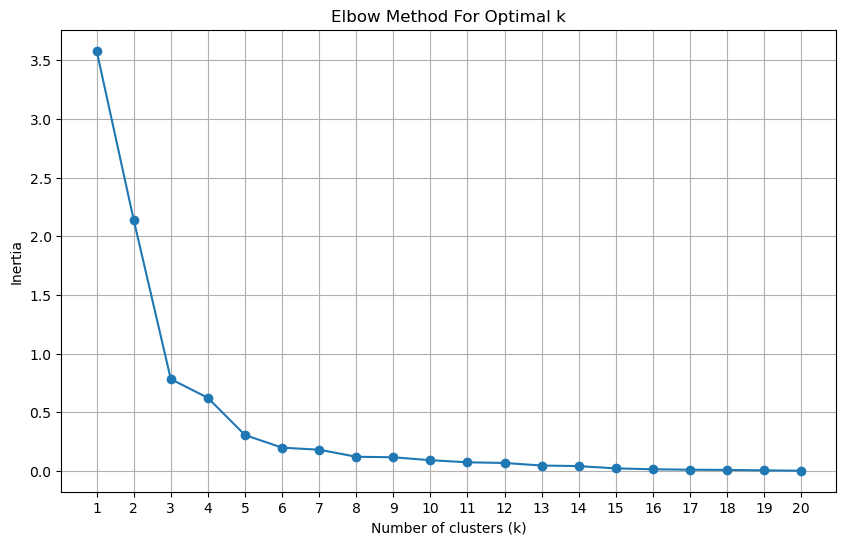

In [21]:
inertia = []
for n in range(1, 21):
    kmeans = KMeans(n_clusters=n, max_iter=1000)
    pipeline = make_pipeline(Normalizer(), PCA(n_components=2), kmeans)
    pipeline.fit(movements)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), inertia, marker="o")
plt.title("Elbow Method For Optimal k")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.xticks(range(1, 21))
plt.grid(True)
plt.show()

In [22]:
normalizer = Normalizer()

reducedData = PCA(n_components = 2)

kmeans = KMeans(n_clusters = 3,max_iter = 1000)

pipeline = make_pipeline(normalizer,reducedData,kmeans)

pipeline.fit(movements)

yPred = pipeline.predict(movements)

df3 = pd.DataFrame({"Cluster":yPred,"Companies":list(companiesDict.keys())}).sort_values(by=["Cluster"],axis = 0)

In [23]:
df3.head()

,Cluster,Companies
11,0,Microsoft
18,0,Honda
17,0,Toyota
15,0,Coca Cola
13,0,American Express


## Plot the Decision Boundary

<Figure size 640x480 with 0 Axes>

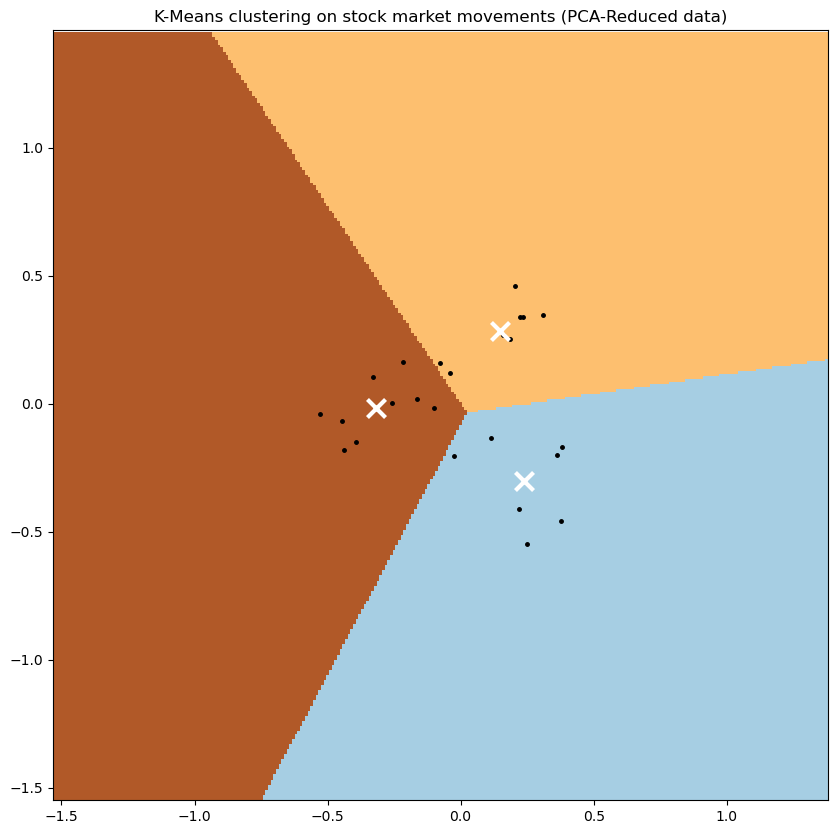

In [24]:
reducedData = PCA(n_components = 2).fit_transform(normMovements)

h = 0.01

xMin,xMax = reducedData[:,0].min()-1, reducedData[:,0].max() + 1
yMin,yMax = reducedData[:,1].min()-1, reducedData[:,1].max() + 1
xx,yy = np.meshgrid(np.arange(xMin,xMax,h),np.arange(yMin,yMax,h))

Z = kmeans.predict(np.c_[xx.ravel(),yy.ravel()])

Z = Z.reshape(xx.shape)

cmap = plt.cm.Paired

plt.clf()
plt.figure(figsize=(10,10))
plt.imshow(Z,interpolation = "nearest",extent=(xx.min(),xx.max(),yy.min(),yy.max()),cmap = cmap,aspect = "auto",origin = "lower")
plt.plot(reducedData[:,0],reducedData[:,1],"k.",markersize = 5)


centroids = kmeans.cluster_centers_
plt.scatter(centroids[:,0],centroids[:,1],marker = "x",s = 169,linewidths = 3,color = "w",zorder = 10)
plt.title("K-Means clustering on stock market movements (PCA-Reduced data)")
plt.xlim(xMin,xMax)
plt.ylim(yMin,yMax)
plt.show()

## Hierarchial Clustering

In [25]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist 

In [26]:
Z = linkage(normMovements, metric='euclidean', method='average')
c, cophDists = cophenet(Z , pdist(normMovements))

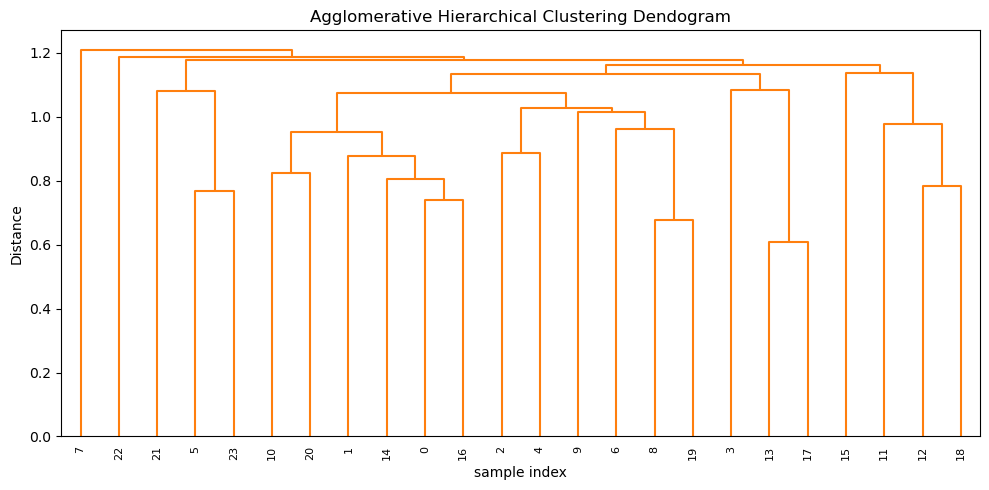

In [27]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

In [28]:
Z = linkage(normMovements, metric='euclidean', method='complete')
c, cophDists = cophenet(Z , pdist(normMovements))

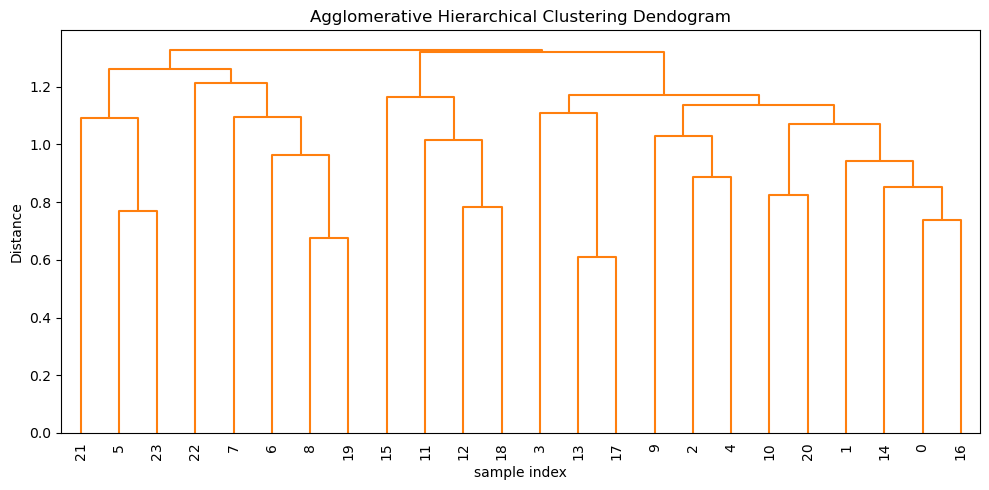

In [29]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold=90,  leaf_font_size=10. )
plt.tight_layout()

In [30]:
Z = linkage(normMovements, metric='euclidean', method='ward')
c, cophDists = cophenet(Z , pdist(normMovements))

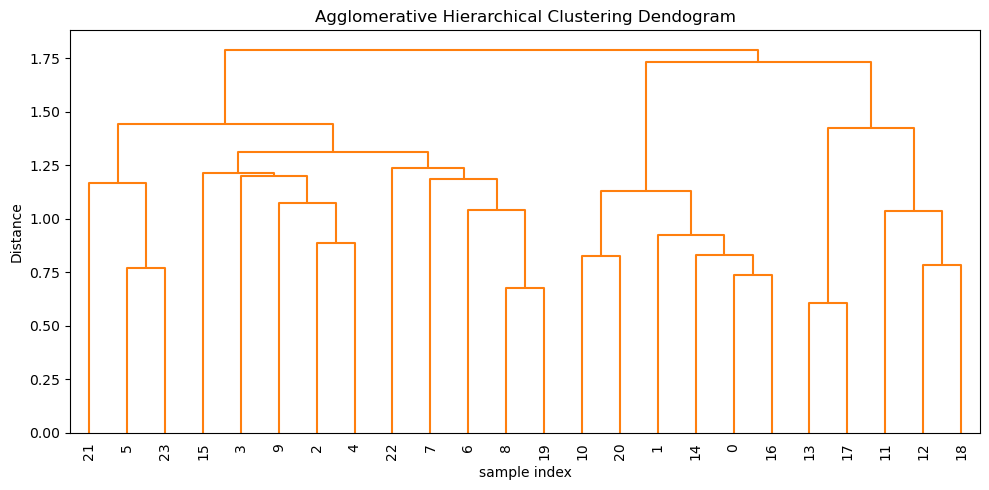

In [31]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold=600,  leaf_font_size=10. )
plt.tight_layout()